# RNN and CURBD analysis - trial averaged data
### Mouse: M044
### Session: 2024_12_04_09_30

#### Imports

In [124]:
# imports
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
import sys
import os

# Add the project root to sys.path
import sys
sys.path.append('/data/PyalData')

import pyaldata as pyal
import pylab
from collections import Counter
import importlib

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# for RNN and CURBD
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from tools.curbd import curbd
from tools.dsp.preprocessing import preprocess
from tools.rnn_and_curbd import rnn as rnnz
from tools.rnn_and_curbd import plotting as pltz
from tools.rnn_and_curbd import model_analysis as analyz
from tools.rnn_and_curbd import curbd as curbdz

importlib.reload(rnnz)
importlib.reload(pltz)
importlib.reload(analyz)
importlib.reload(curbdz)

np.random.seed(44)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load session data

In [2]:
data_dir = "/data/bnd-data/raw/M044/M044_2024_12_04_09_30"
mat_file = "M044_2024_12_04_09_30_pyaldata.mat"

In [3]:
fname = os.path.join(data_dir, mat_file)
df = pyal.mat2dataframe(fname, shift_idx_fields=True)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.


### Preprocessing

In [4]:
df_ = preprocess(df, only_trials=True)
areas = ["M1_rates", "Dls_rates"]
df_["M1_rates"] = [df_["all_rates"][i][:,300:] for i in range(len(df_))]
df_["Dls_rates"] = [df_["all_rates"][i][:,0:300] for i in range(len(df_))]

/data/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 133)


In [5]:
df_.head()

,animal,session,trial_id,trial_name,trial_length,bin_size,idx_trial_start,idx_trial_end,idx_CPI,values_before_camera_trigger,...,idx_session_timer,all_chan_best,all_unit_guide,all_KSLabel,all_spikes,all_rates,sol_level_id,sol_contra_ipsi,M1_rates,Dls_rates
0,M044,M044_2024_12_04_09_30,2,trial,401,0.03,20033,20166,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 2.7987738450368247, 0.0, 2.79...",0,0,"[[0.0003196751701276905, 0.00397311378037557, ...","[[0.0, 0.0, 0.0, 2.7987738450368247, 0.0, 2.79..."
1,M044,M044_2024_12_04_09_30,4,trial,401,0.03,20199,20333,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9180974215269089,...",0,1,"[[0.00397311378037557, 0.0, 12.949475646018982...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9180974215269089,..."
2,M044,M044_2024_12_04_09_30,6,trial,401,0.03,20366,20499,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[3.0603396395842237, 0.0, 0.0, 0.0, 3.0111658...",1,1,"[[0.0, 21.71955704689026, 0.0, 12.949475646018...","[[3.0603396395842237, 0.0, 0.0, 0.0, 3.0111658..."
3,M044,M044_2024_12_04_09_30,8,trial,401,0.03,20733,20866,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[[0.0, 0.0, 0.0, 2.7987738450368247, 0.0, 0.03...",0,1,"[[0.00397311378037557, 0.0, 0.0, 12.9494756460...","[[0.0, 0.0, 0.0, 2.7987738450368247, 0.0, 0.03..."
4,M044,M044_2024_12_04_09_30,10,trial,401,0.03,21033,21166,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.05314686568453908, 0.0, 0.0494934269227087...",0,0,"[[0.0, 0.0, 0.00397311378037557, 0.0, 0.0, 1.1...","[[0.05314686568453908, 0.0, 0.0494934269227087..."


### Some parameters

In [71]:
# Get mouse number
mouse = mat_file.split('_')[0]

# perturbation time
perturbation_time = df_.idx_sol_on[0]
perturbation_time_sec = df_.idx_sol_on[0] * df['bin_size'][0]

# bin size
BIN_SIZE = df['bin_size'][0]

# solenoid angles
sol_angles: list = df_.values_Sol_direction.unique()
sol_angles.sort()

# number of trials
num_trials = len(df_)
print(f"Number of trials: {num_trials}")

# Set interpolation factor for RNN 
dtFactor = 2

Number of trials: 533


### Conactanate trials only

In [7]:
# getting trial avg data
trial_avg_rates = rnnz.average_by_trial(df_, sol_angles)
shapes = [arr.shape[0] for arr in trial_avg_rates]

# concatenate data
concat_rates = np.concatenate(trial_avg_rates, axis=0)

print("Averaged activity shape:", trial_avg_rates.shape)
print("Concatenated average activity shape:", concat_rates.shape)

# set up for RNN
trial_avg_activity = np.transpose(concat_rates)
reset_points = rnnz.get_reset_points(df_, trial_avg_activity, areas, dtFactor)
regions_arr = rnnz.get_regions(df_, areas)

print(f"Building {len(regions_arr)} region RNN network")
print(f"Regions: {[region[0] for region in regions_arr]}\n")

Averaged activity shape: (11, 133, 474)
Concatenated average activity shape: (1463, 474)
Trial length: 133
Building 2 region RNN network
Regions: ['M1', 'Dls']



### Plot RNN input

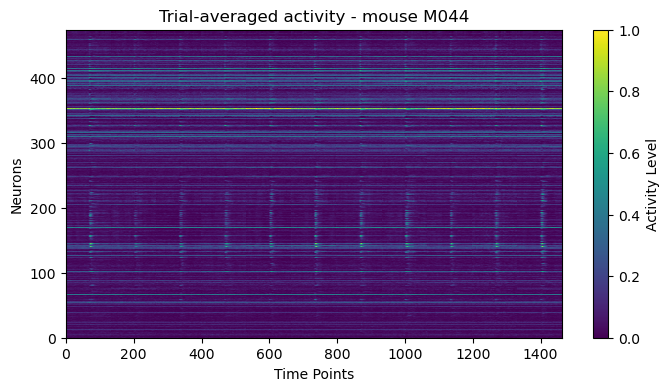

In [8]:
pltz.plot_neuron_activity(rnnz.rescale_array(trial_avg_activity.T), "Trial-averaged activity", mouse)

## RNN training

In [9]:
# RNN hyperparameters
dtFactor = 2 # Set interpolation factor for RNN 
nRunTrain = 5

reset points length: 533
last reset at: 141512
RNN input shape: (474, 1463)
trial=0 pVar=0.884195 chi2=1.364673
trial=1 pVar=0.911536 chi2=1.071505
trial=2 pVar=0.910394 chi2=1.090284
trial=3 pVar=0.913182 chi2=1.056205
trial=4 pVar=0.914538 chi2=1.038460
trial=5 pVar=0.911793 chi2=1.081711


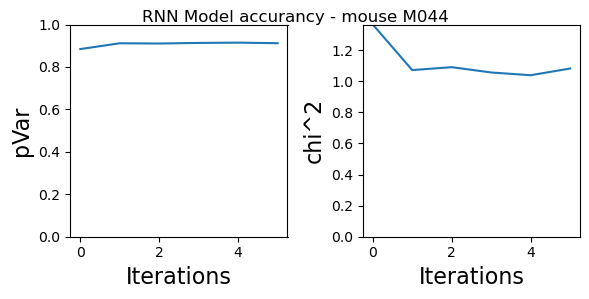

In [10]:
rnn_model, rnn_accuracy_fig = rnnz.run_rnn(trial_avg_activity, reset_points, regions_arr, df_, mouse, dtFactor = dtFactor, nRunTrain = nRunTrain)

### Plot RNN output

In [11]:
rnn_model_ = rnn_model.copy()
rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)

RNN model output transformed from shape: (474, 2925) to (474, 1463). Matching the original data shape of (474, 1463)


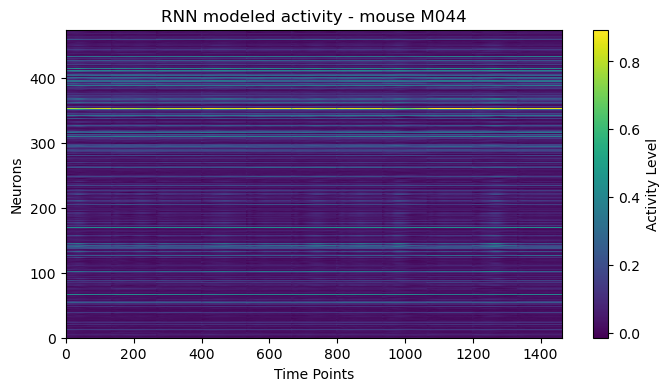

In [12]:
pltz.plot_neuron_activity(rnn_model_['RNN'].T, "RNN modeled activity", mouse)

## Analysis of model fit

### PCA whole model

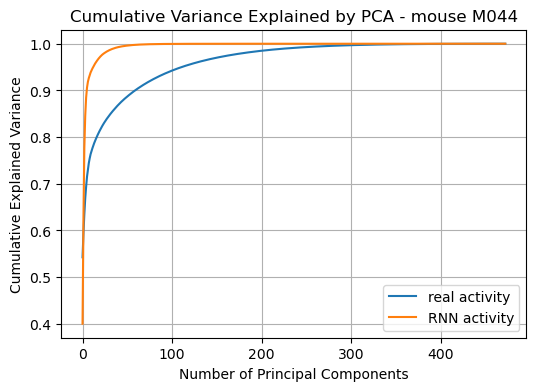

In [13]:
rnn_activity = rnn_model_['RNN'].T
real_activity = rnn_model_['Adata'].T
num_components = rnn_activity.shape[1] - 1

pca_real, pca_data_real = analyz.pca_fit_transform(real_activity, num_components)
pca_rnn, pca_data_rnn = analyz.pca_fit_transform(rnn_activity, num_components)

variance_figure = pltz.plot_pca_cum_var(pca_real, pca_rnn, mouse)

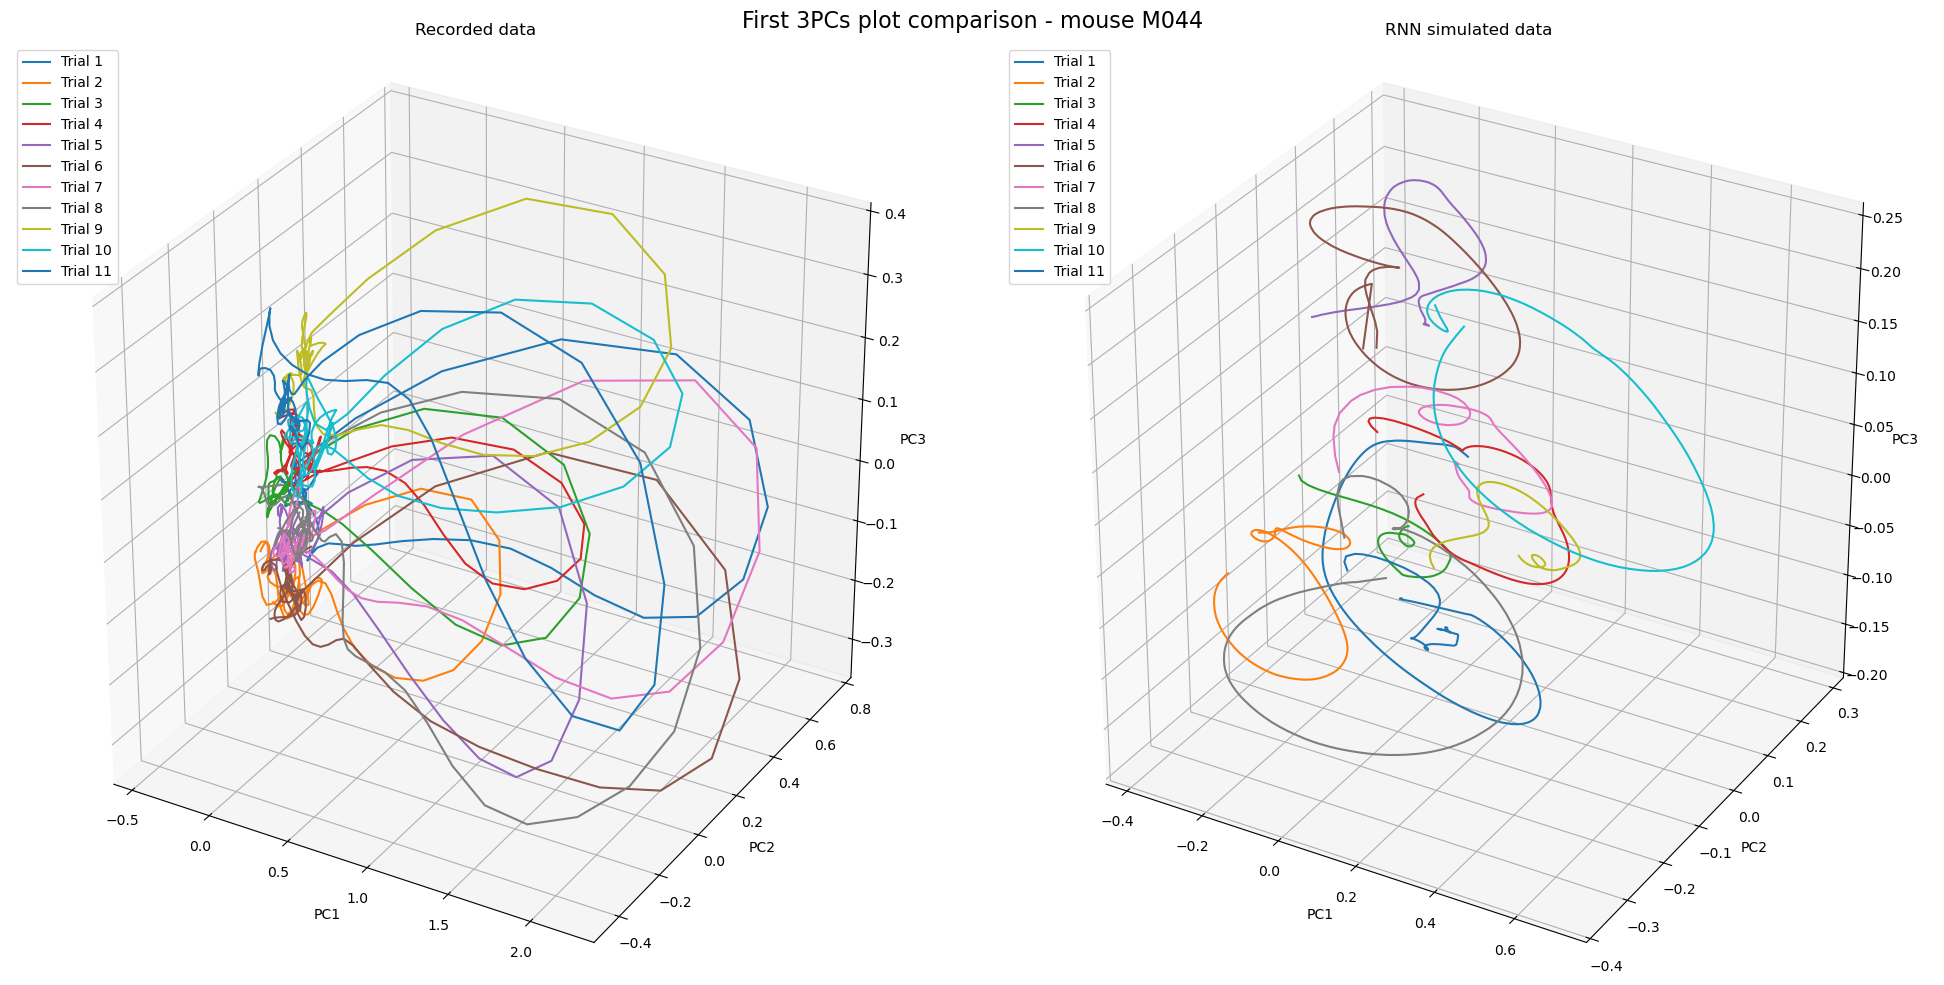

In [14]:
PCA_figure = pltz.plot_pca(pca_data_real, pca_data_rnn, shapes, mouse)

### CCA

In [15]:
model_cca = analyz.canoncorr(pca_data_real, pca_data_rnn)
ctrl1_cca = analyz.canoncorr(pca_data_real, pca_data_real)
ctrl2_cca = analyz.canoncorr(pca_data_rnn, pca_data_rnn)

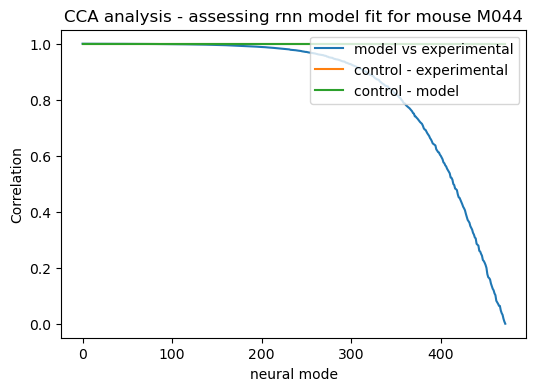

In [16]:
cca_figure = pltz.plot_cca(model_cca, ctrl1_cca, ctrl2_cca, mouse)

### PCA by brain region

In [17]:
PCA_data_real, pcas_real = analyz.pca_by_region(real_activity, regions_arr)
PCA_data_rnn, pcas_rnn = analyz.pca_by_region(rnn_activity, regions_arr)

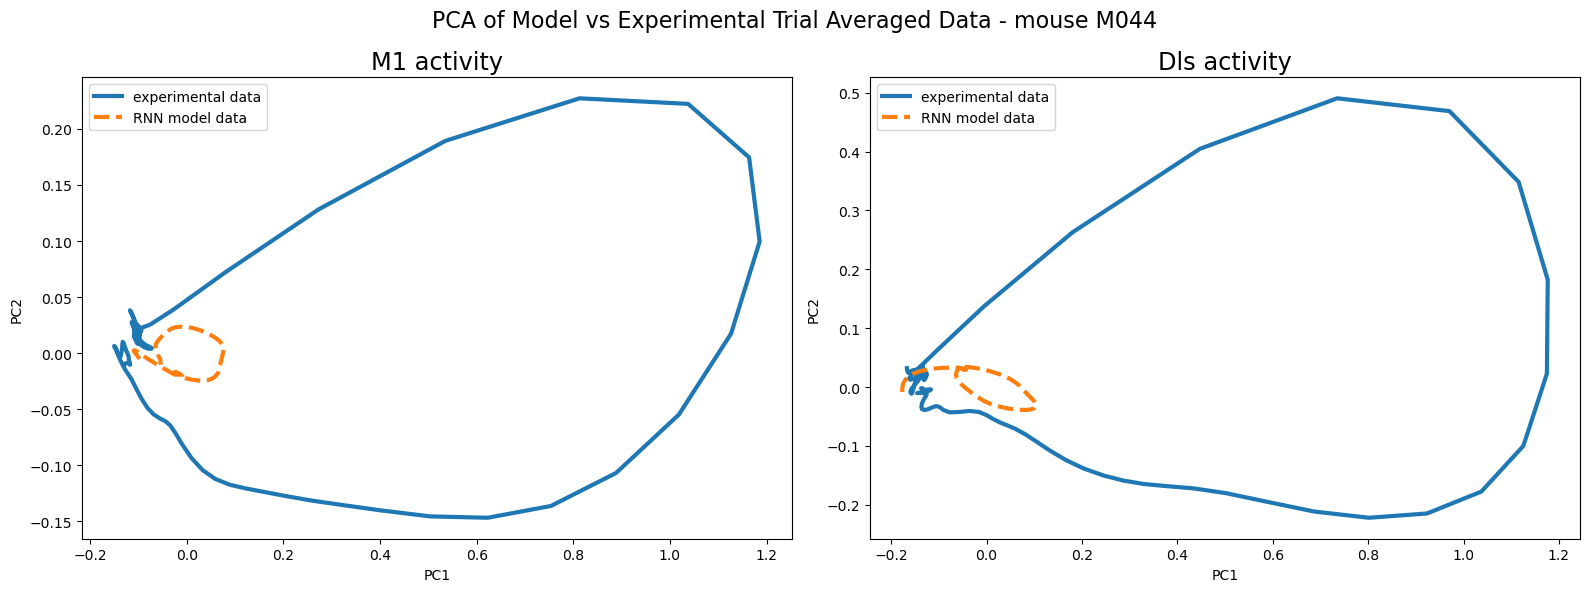

In [18]:
figure = pltz.plot_pca_by_region(PCA_data_real, PCA_data_rnn, shapes, regions_arr, mouse)

### Weight matrix

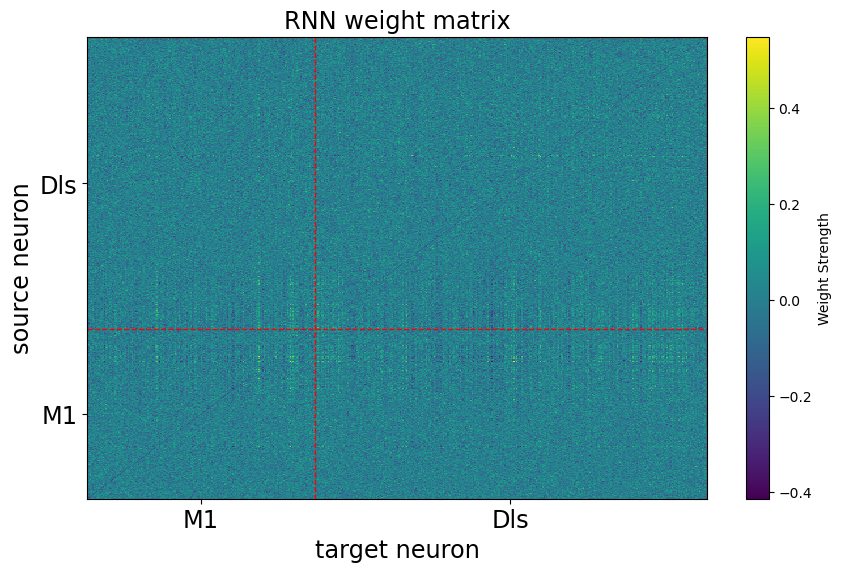

In [21]:
weight_matrix_fig = pltz.plot_rnn_weight_matrix(rnn_model, regions_arr)

### Firing rate analysis

In [48]:
print(reset_points)

[0, 266, 532, 798, 1064, 1330, 1596, 1862, 2128, 2394, 2660, 2926, 3192, 3458, 3724, 3990, 4256, 4522, 4788, 5054, 5320, 5586, 5852, 6118, 6384, 6650, 6916, 7182, 7448, 7714, 7980, 8246, 8512, 8778, 9044, 9310, 9576, 9842, 10108, 10374, 10640, 10906, 11172, 11438, 11704, 11970, 12236, 12502, 12768, 13034, 13300, 13566, 13832, 14098, 14364, 14630, 14896, 15162, 15428, 15694, 15960, 16226, 16492, 16758, 17024, 17290, 17556, 17822, 18088, 18354, 18620, 18886, 19152, 19418, 19684, 19950, 20216, 20482, 20748, 21014, 21280, 21546, 21812, 22078, 22344, 22610, 22876, 23142, 23408, 23674, 23940, 24206, 24472, 24738, 25004, 25270, 25536, 25802, 26068, 26334, 26600, 26866, 27132, 27398, 27664, 27930, 28196, 28462, 28728, 28994, 29260, 29526, 29792, 30058, 30324, 30590, 30856, 31122, 31388, 31654, 31920, 32186, 32452, 32718, 32984, 33250, 33516, 33782, 34048, 34314, 34580, 34846, 35112, 35378, 35644, 35910, 36176, 36442, 36708, 36974, 37240, 37506, 37772, 38038, 38304, 38570, 38836, 39102, 39368, 

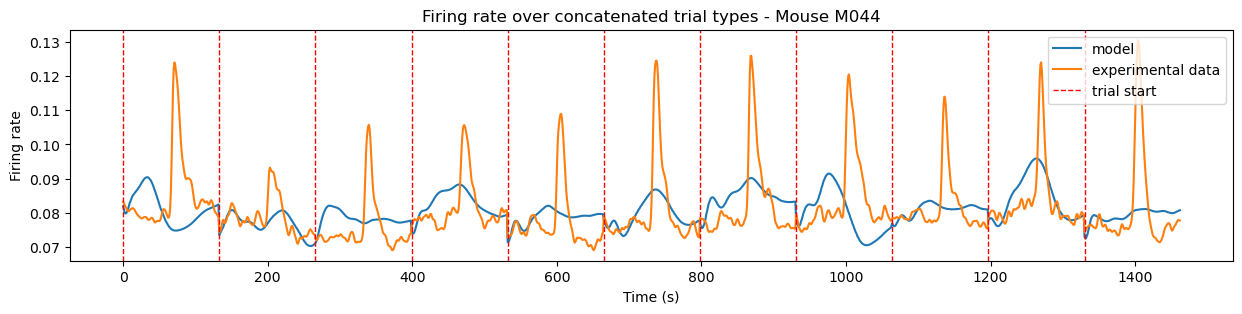

In [65]:
fr_fig = pltz.plot_firing_rates(rnn_model_, reset_points, mouse)

/home/zms24/Desktop/earthquake-analysis/tools/rnn_and_curbd/plotting.py:237: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


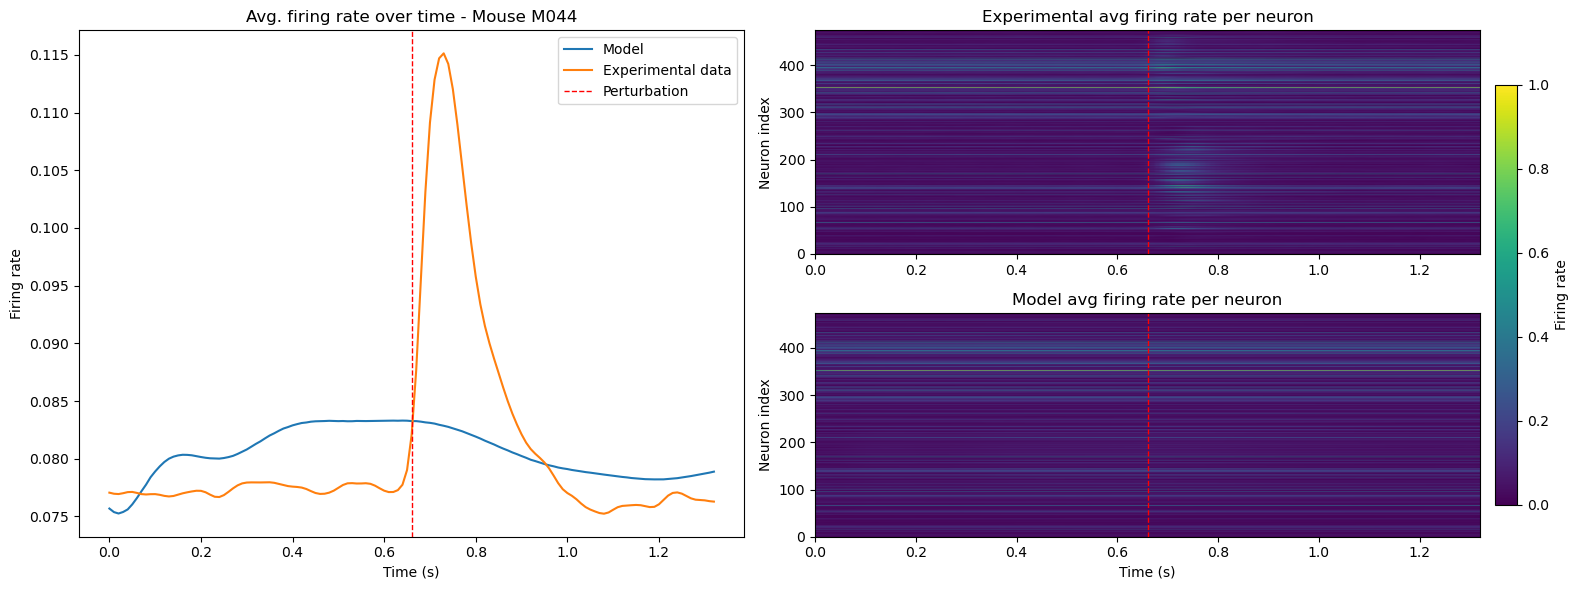

In [100]:
avg_fr_fig = pltz.plot_avg_firing_rates(rnn_model_, shapes, perturbation_time_sec, bin_size=BIN_SIZE, mouse_num=mouse)

## CURBD

In [102]:
curbd_arr, curbd_labels = curbd.computeCURBD(rnn_model)
n_regions = curbd_arr.shape[0]

In [105]:
currents, current_labels = curbdz.format_curbd_output(curbd_arr, curbd_labels, n_regions, reset_points)

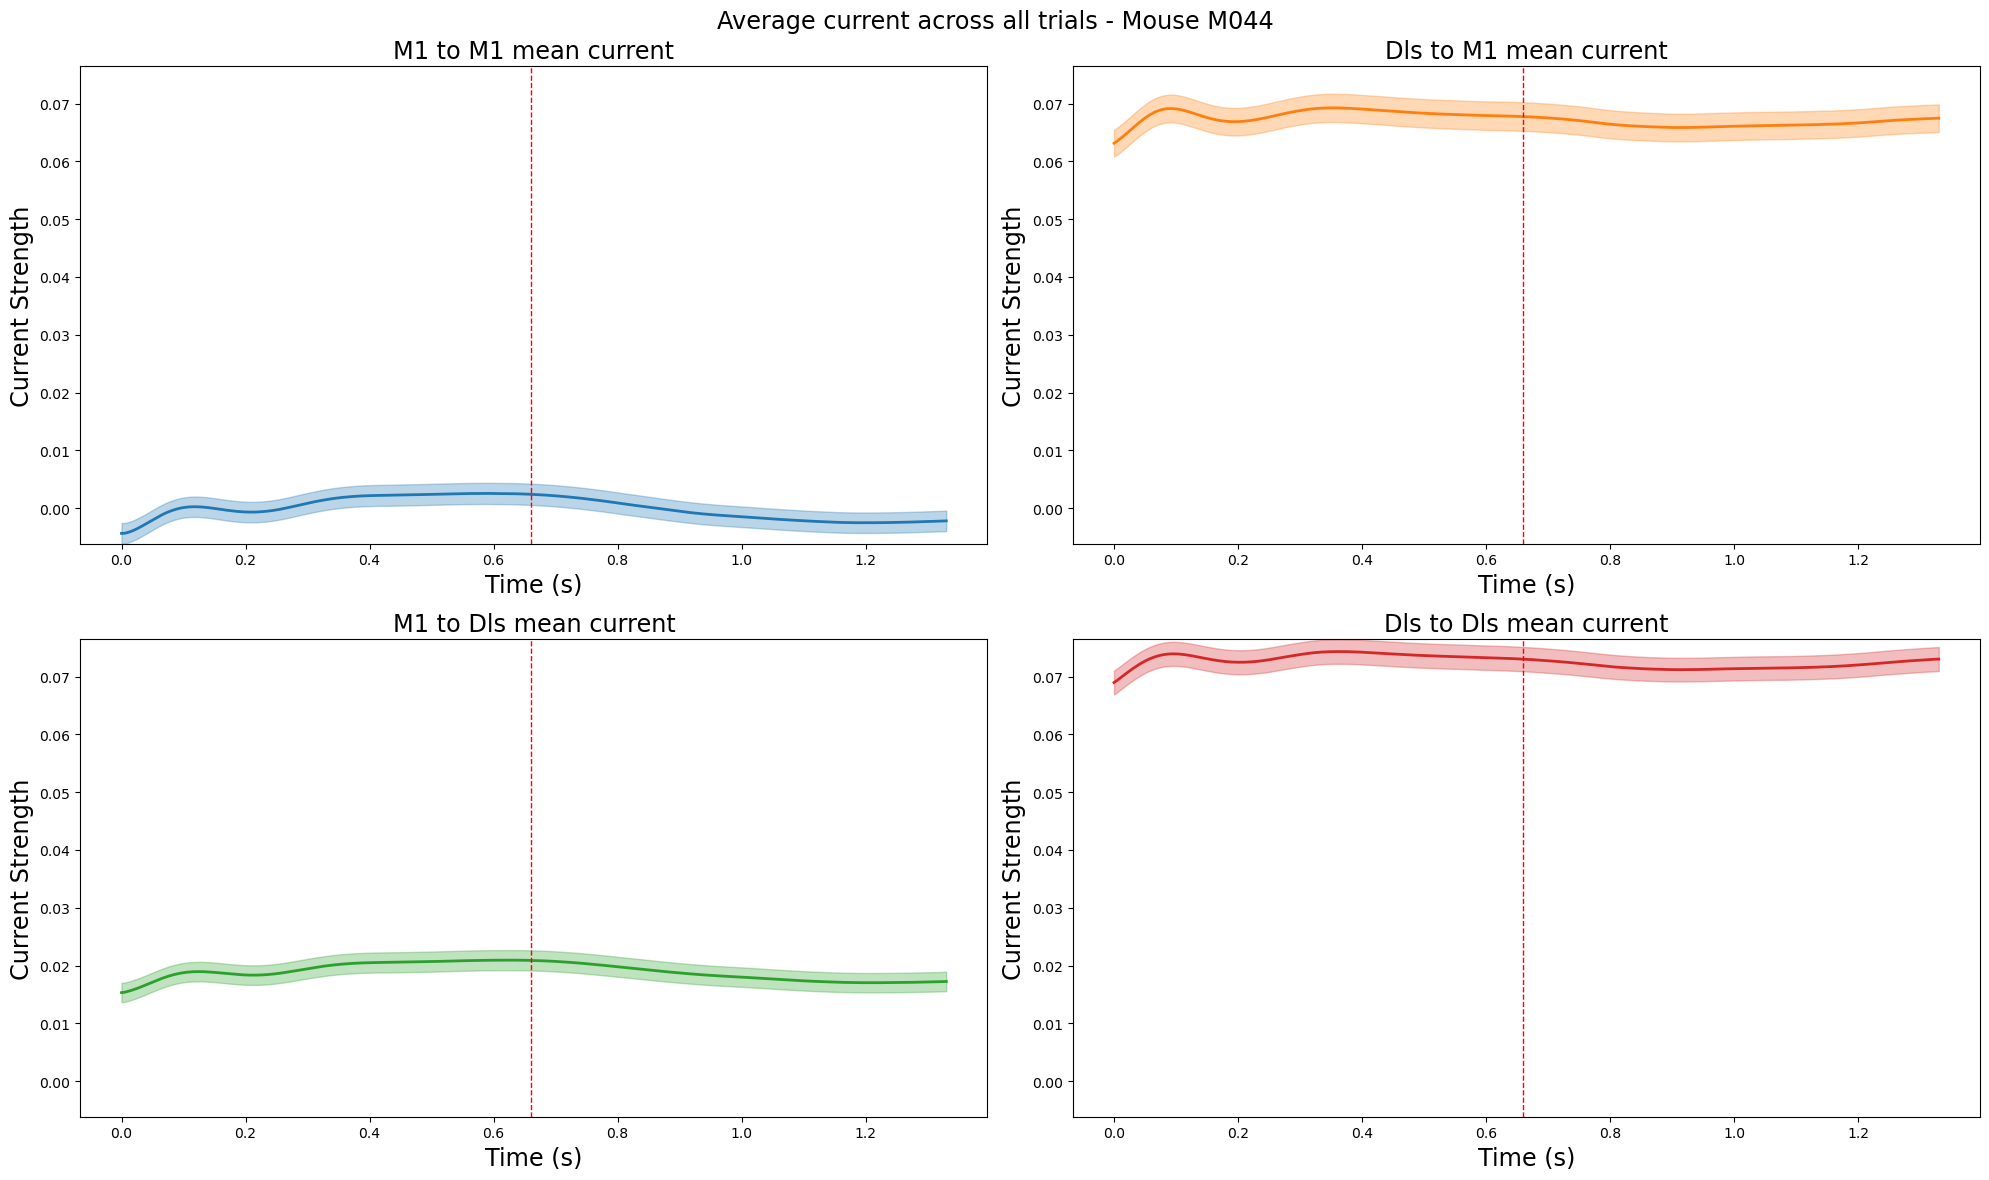

In [107]:
currents_fig = pltz.plot_currents_by_region(currents, current_labels, perturbation_time_sec, BIN_SIZE, dtFactor, mouse)

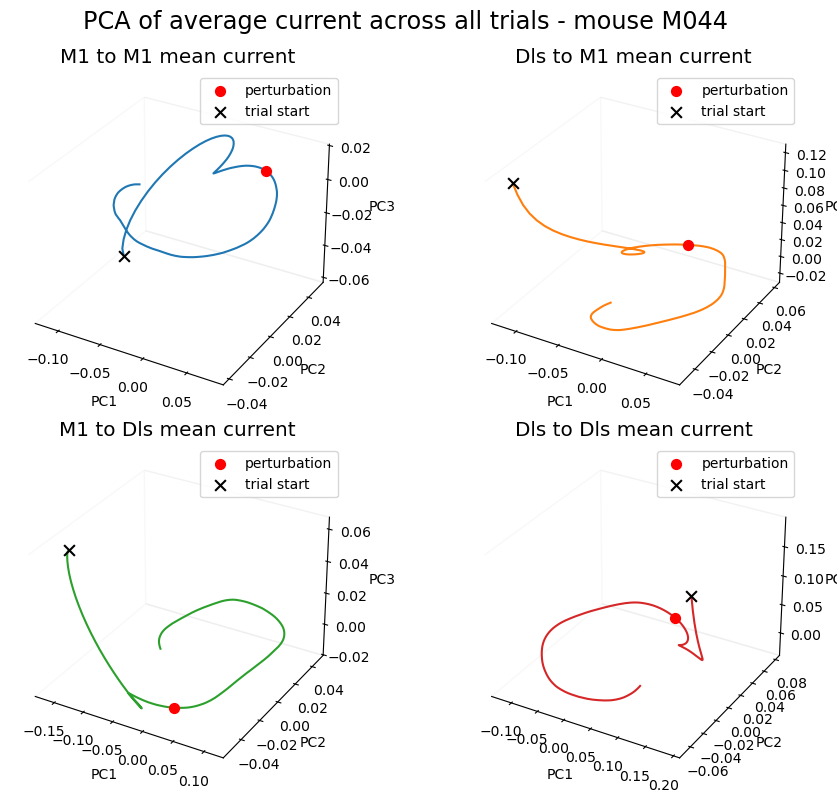

In [122]:
pca_current_fig = pltz.plot_pca_currents(currents, current_labels, perturbation_time, mouse)

### Saving RNN model

In [125]:
rnn_model_to_save = rnn_model.copy()
try:
    if isinstance(rnn_model_to_save['params'].get('nonLinearity'), np.ufunc):
        rnn_model_to_save['params']['nonLinearity'] = rnn_model_to_save['params']['nonLinearity'].__name__
    savemat(f"rnn_model_{mouse}.mat", {"rnn_model": rnn_model_to_save})
except Exception as e:
    print(f"Error saving RNN model for mouse {mouse}:", e)